<a href="https://colab.research.google.com/github/TharunDoma/test1/blob/main/Boston_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name: Tharun Doma

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [15]:
# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [3]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [4]:
# examine the first few rows of data
bostondata.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V846131,1013,2025-07-11 09:16:34,Open,1001.3.2,NaN,Testing & Certification,762A,762,Tremont,...,09,762 Tremont St,NaN,Boston,MA,02118,170469.0,42.339590,-71.079164,"(42.33958960011894, -71.07916364253342)"
2,V846111,1013,2025-07-11 08:37:15,Open,105.1,NaN,Failure to Obtain Permit,5,NaN,Saint John,...,19,619 Centre St,NaN,Jamaica Plain,MA,02130,121254.0,42.313940,-71.113471,"(42.31393959798791, -71.11347067037214)"
3,V845939,1013,2025-07-10 09:50:12,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,23 Dawson,NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"
4,V845936,1013,2025-07-10 09:46:04,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,"18 Mt Calvary Road, Unit 9",NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [ ]:
#Question 1 Part A using code, show the nulls in the dataframe

In [12]:

bostondata.isnull().sum()

,0
case_no,0
ap_case_defn_key,0
status_dttm,1
status,0
code,0
value,16782
description,247
violation_stno,0
violation_sthigh,12534
violation_street,0


## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:  



**Ways to handle nulls**

Drop nulls using dropna() when data loss is acceptable.

Fill with defaults like "Unknown" or 0 using fillna().

Impute with stats—mean, median, or mode for smarter replacements.

Use forward/backward fill (ffill, bfill) for time series.

Replace empty strings manually if they're not technically nulls

In [9]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/tmp/ipython-input-9-254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [10]:
# prompt: # Question 2 code: lets get the value counts for our new column

bostondata['month'].value_counts()


,count
month,
3.0,1721
9.0,1649
5.0,1594
6.0,1504
4.0,1501
7.0,1421
2.0,1404
10.0,1358
8.0,1283


In [7]:
# Question 2 code: lets get the value counts for our new column

## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [ ]:
#Question 3 code: statistical information

In [11]:
# prompt: Question 3 code: statistical information

bostondata.describe()

,ap_case_defn_key,value,sam_id,latitude,longitude,month
count,16782.0,0.0,16690.000000,16689.000000,16689.000000,16781.000000
mean,1013.0,NaN,98647.667645,42.260501,-71.101029,6.297956
std,0.0,NaN,74503.376587,0.719364,0.231153,3.300704
min,1013.0,NaN,0.000000,34.244387,-73.651391,1.000000
25%,1013.0,NaN,48360.250000,42.295670,-71.099841,3.000000
50%,1013.0,NaN,92897.000000,42.325629,-71.075021,6.000000
75%,1013.0,NaN,132511.750000,42.353488,-71.058570,9.000000
max,1013.0,NaN,460046.000000,42.392699,-70.995970,12.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [13]:
#Question 4 Part A Code: Value Counts
bostondata['description'].value_counts(normalize=True)



,proportion
description,
Failure to Obtain Permit,0.245661
Unsafe and Dangerous,0.219171
Maintenance,0.098034
Testing & Certification,0.054067
Unsafe Structures,0.042213
...,...
Grounding electrode conduction,0.000060
Removal/Making Structure Safe,0.000060
Use & Occupancy,0.000060


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:




Based on the reported proportions, the top three issues are:

1. Failure to Obtain Permit – 24.57%
2. Unsafe and Dangerous Conditions – 21.92%
3. Maintenance Issues – 9.80%

## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

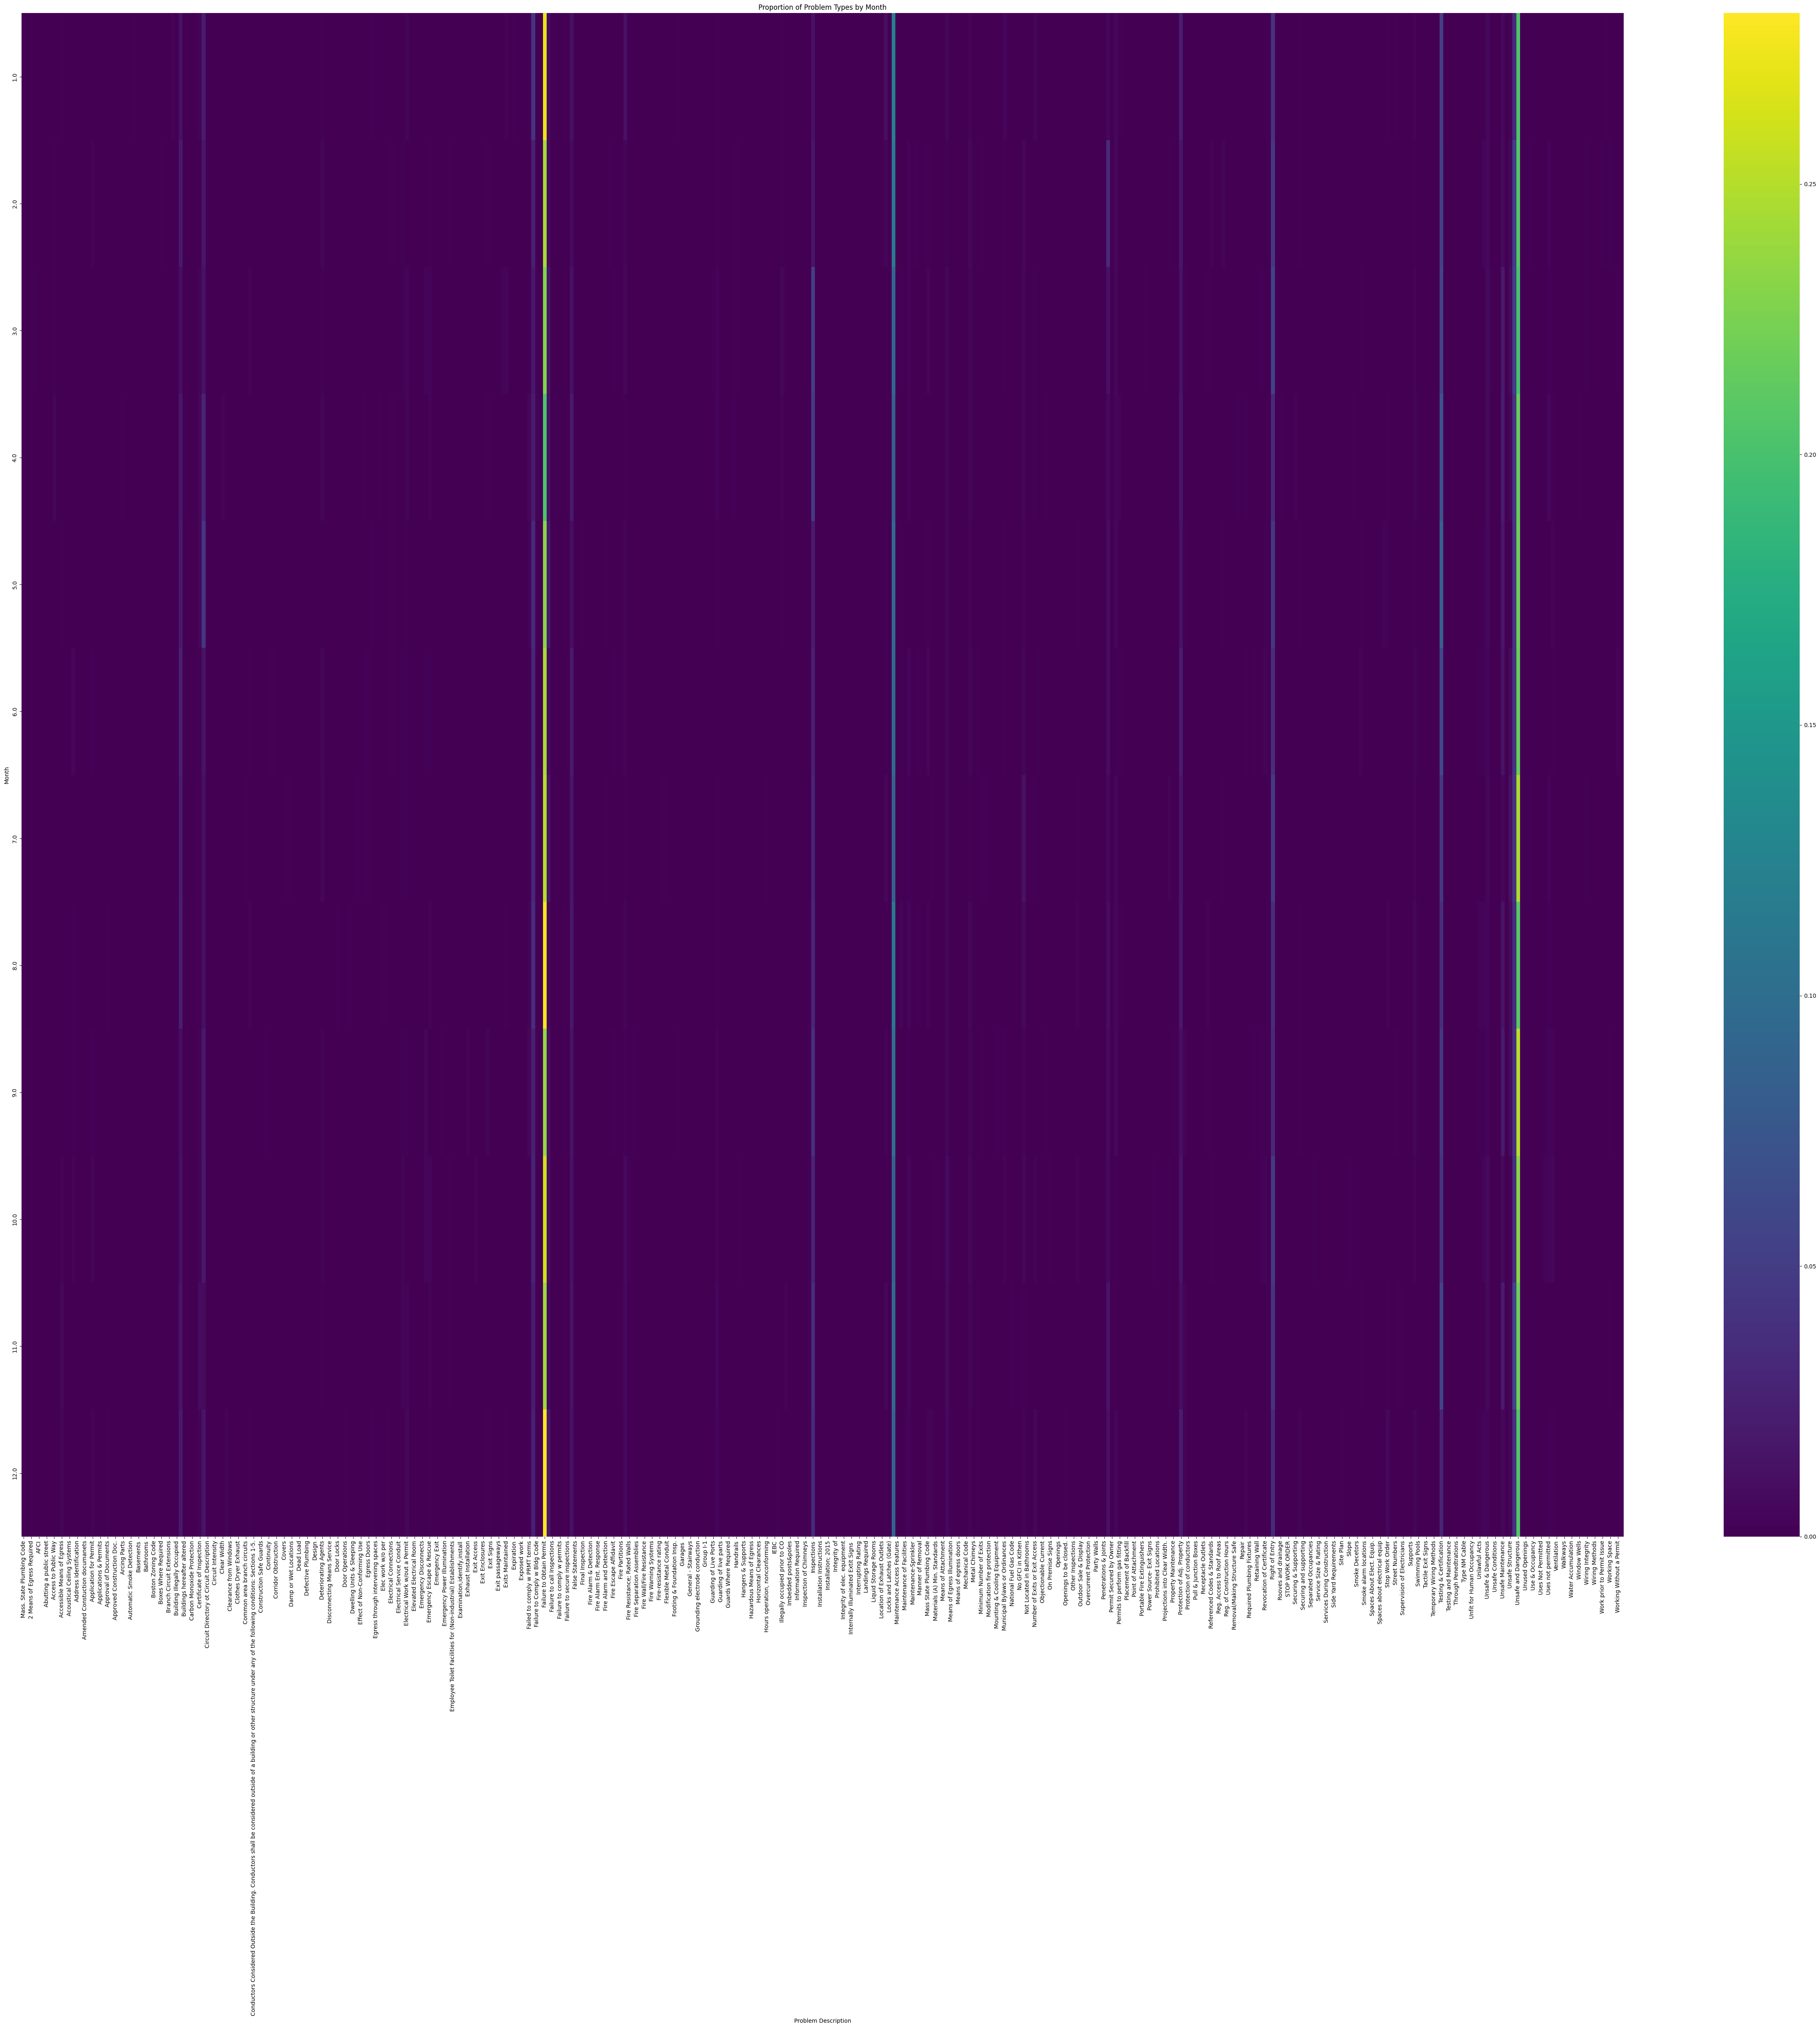

In [34]:

# Group by month and description, then count occurrences
problem_month = bostondata.groupby(['month', 'description']).size().reset_index(name='count')

# Pivot the table to have months as rows and descriptions as columns
problem_month_pivot = problem_month.pivot_table(index='month', columns='description', values='count', fill_value=0)

# Normalize the data to show proportions within each month
problem_month_normalized = problem_month_pivot.apply(lambda x: x / x.sum(), axis=1)

# Create a heatmap to visualize the patterns
plt.figure(figsize=(50, 50))
sns.heatmap(problem_month_normalized, cmap="viridis", annot=False)
plt.title('Proportion of Problem Types by Month')
plt.xlabel('Problem Description')
plt.ylabel('Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:


Based on the heatmap visualization:

Permit-related issues (Failure to Obtain Permit)** appear to have a higher proportion in the earlier months of the year (e.g., 1, 2, 3, 4) compared to later months.
Unsafe and Dangerous Conditions** seem to show a relatively consistent proportion across most months, perhaps slightly lower in the summer months.
Maintenance Issues** also appear somewhat consistent, possibly increasing slightly in the later months of the year (e.g., 9, 10, 11, 12).
  Other problem types generally have smaller proportions and may show more varied patterns across the months.

Overall, there does appear to be some seasonality in the types of violations, with permit issues more prevalent in the early year and potentially a slight increase in maintenance issues towards the end of the year.

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [20]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [21]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

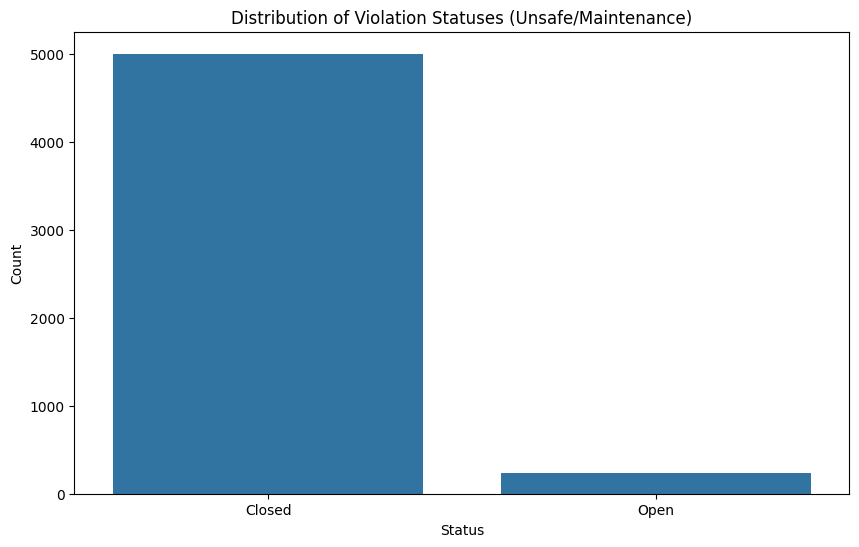

In [22]:
# Question 5 Visualization : Visualize the distribution of violation statuses for the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(data=bostondata_filtered, x='status')
plt.title('Distribution of Violation Statuses (Unsafe/Maintenance)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


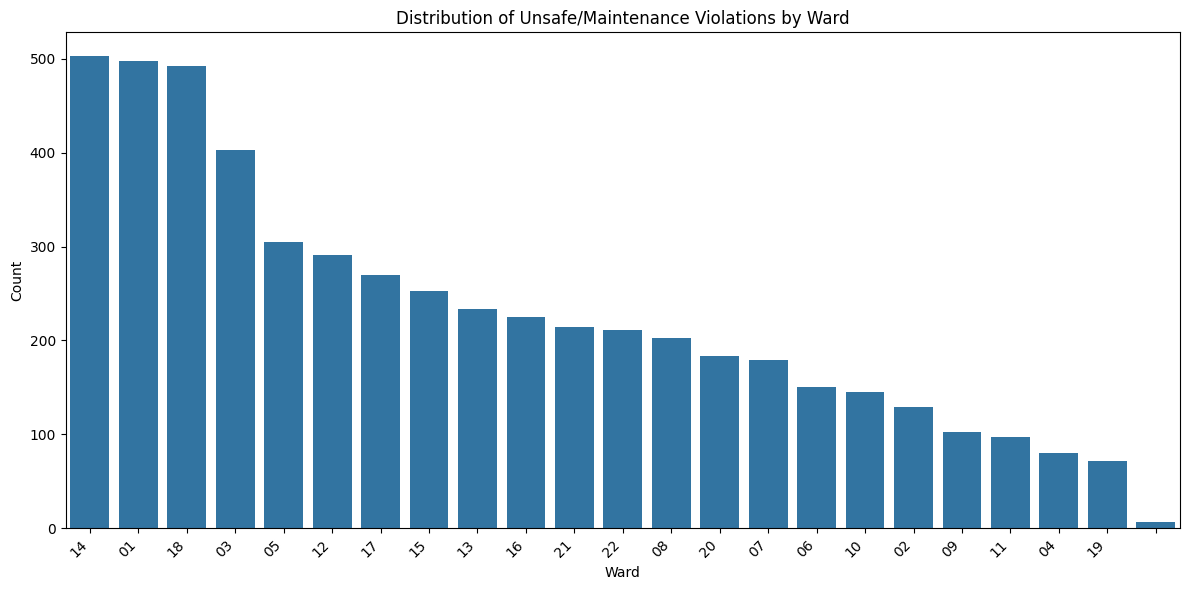

In [32]:
# Question 6 Visualization: Explore the distribution of violations by Ward
plt.figure(figsize=(12, 6))
sns.countplot(data=bostondata_filtered, x='ward', order=bostondata_filtered['ward'].value_counts().index)
plt.title('Distribution of Unsafe/Maintenance Violations by Ward')
plt.xlabel('Ward')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

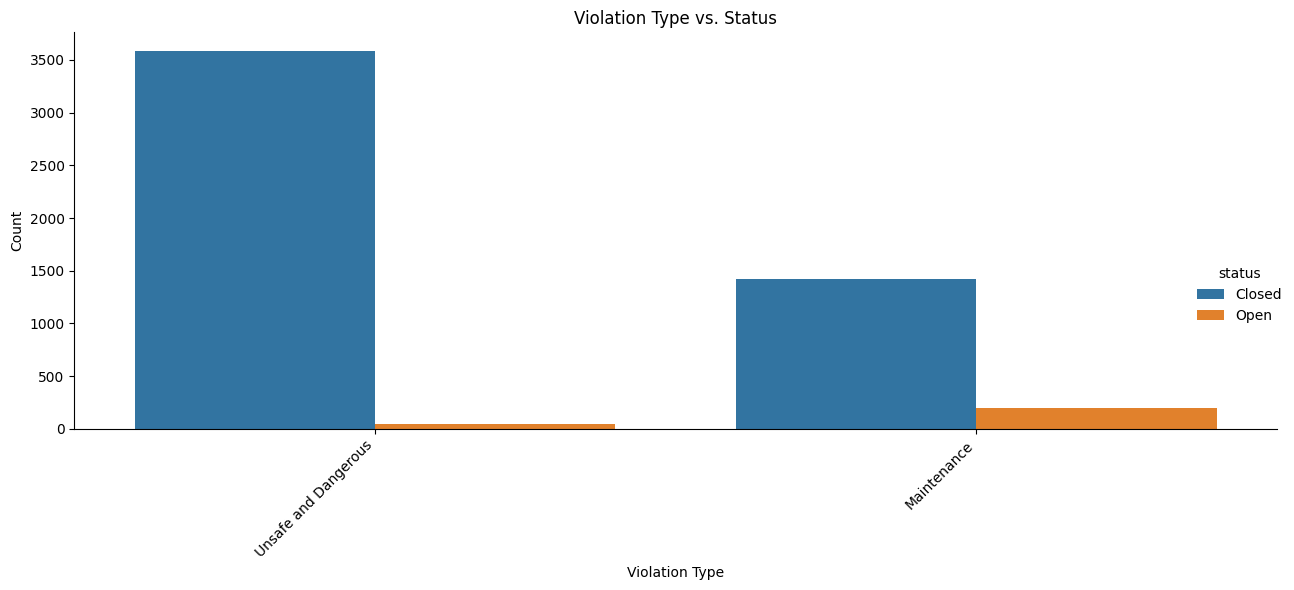

In [29]:
# Question 7 Visualization: Examine the relationship between violation type and status using a grouped bar chart
sns.catplot(data=bostondata_filtered, x='description', hue='status', kind='count', height=6, aspect=2)
plt.title('Violation Type vs. Status')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

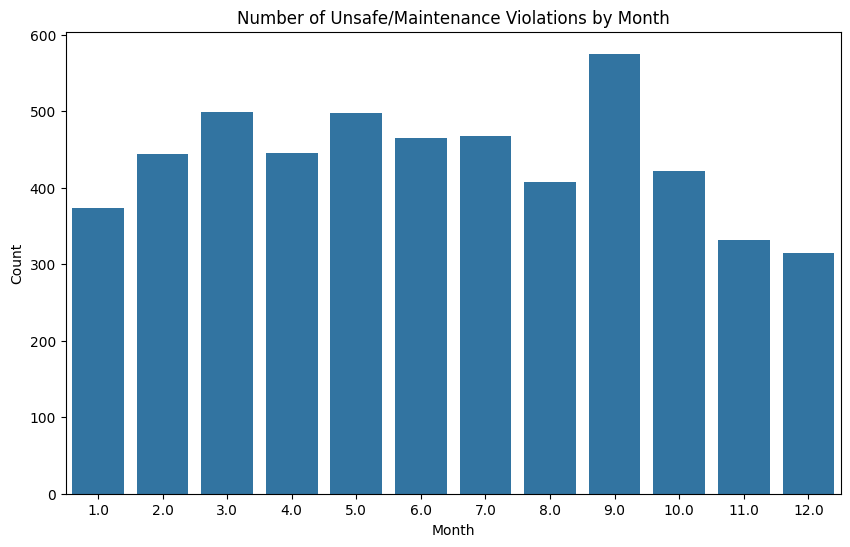

In [25]:
# Question 8 Visualization: Look at the number of violations by month for the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(data=bostondata_filtered, x='month')
plt.title('Number of Unsafe/Maintenance Violations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:



Based on the exploratory data analysis performed on the Boston Building and Property Violations dataset, I've learned the following:

1.  **Missing Data:** The dataset contains null values, particularly in columns that were not directly analyzed in this exercise. Understanding the extent and nature of these nulls is crucial for deciding on appropriate handling strategies (dropping, filling, or imputing).

2.  **Data Transformation:** Creating a 'month' column from the 'status\_dttm' timestamp allowed for analysis of potential seasonality in violations. This involved extracting the month, handling inconsistent entries (like the empty string replaced with '09'), and converting the data type to numeric.

3.  **Violation Frequency by Month:** Analysis of the 'month' column revealed the distribution of violations across the year.

4.  **Most Common Violations:** By examining the normalized value counts of the 'description' column, I identified the top three most frequent types of violations: 'Failure to Obtain Permit', 'Unsafe and Dangerous Conditions', and 'Maintenance Issues'.

5.  **Seasonal Patterns in Violations:** The heatmap visualizing the proportion of problem types by month suggested potential seasonality. 'Failure to Obtain Permit' violations appeared proportionally higher in the earlier months, while 'Maintenance Issues' might show a slight increase in later months. 'Unsafe and Dangerous Conditions' seemed relatively consistent throughout the year.

6.  **Focusing on Key Violation Types:** Filtering the dataset to include only 'Unsafe and Dangerous' and 'Maintenance' violations allowed for a deeper dive into these specific categories.

7.  **Distribution of Statuses:** The countplot of 'status' for the filtered data showed the distribution of violation statuses (e.g., 'Closed', 'Open', 'Cancelled') for the Unsafe/Maintenance issues.

8.  **Geographic Distribution:** Visualizing violations by 'ward' highlighted areas with a higher concentration of Unsafe/Maintenance issues, indicating potential hotspots.

9.  **Relationship Between Type and Status:** The catplot examining 'description' vs. 'status' provided insight into how often each of the filtered violation types ('Unsafe and Dangerous', 'Maintenance') fall into different statuses. This could reveal if certain types are more likely to be closed, open, etc.

10. **Monthly Trends in Filtered Data:** The countplot of 'month' for the filtered data showed the monthly distribution specifically for Unsafe/Maintenance violations, potentially confirming or adding nuance to the overall seasonality observed in the full dataset.

Overall, the EDA process provided a foundational understanding of the dataset, including data quality issues (nulls), key characteristics (common violations, geographic distribution), and potential temporal patterns. This knowledge is essential for subsequent steps like feature engineering, modeling, and drawing actionable conclusions. The visualizations were particularly helpful in uncovering patterns and distributions that might not be evident from summary statistics alone.
```